**Imports**

In [83]:
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator
import random
import numpy as np
import pandas as pd
from bs4 import BeautifulSoup
import requests
colors = ['crimson','midnightblue', 'violet','orange','springgreen','dodgerblue','darkviolet', 'olive','tomato']
# random.shuffle(colors)
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=colors)

**Data scrape (2014)**

In [84]:
URL = "https://www.nbi.dk/~koskinen/Teaching/AdvancedMethodsInAppliedStatistics2024/data/2014KenPomeroy.html"
page = requests.get(URL)
soup = BeautifulSoup(page.content,"html.parser")
table = soup.find('table')

In [85]:
table = soup.find('table') # Find the table

temporary = []

for row in table.find_all('tr'): # Extract the rows
    cells = row.find_all('td') # Get cells
    if len(cells) > 0:  # Skips header
        team_name = cells[0].text.strip()
        rank = cells[1].text.strip() # Not sure what this is 
        conf = cells[2].text.strip()
        WL_ratio = cells[3].text.strip()
        AdjEM = cells[4].text.strip()
        AdjO = cells[5].text.strip()
        AdjD = cells[7].text.strip()
        AdjT = cells[9].text.strip()
        Luck = cells[11].text.strip()
        temporary.append([team_name,rank,conf,WL_ratio,AdjEM,AdjO,AdjD,AdjT,Luck])
        
df = pd.DataFrame(temporary, columns=['-', 'Team', 'Conference', 'W-L Ratio', 'AdjEM', 'AdjO', 'AdjD', 'AdjT', 'Luck'])
df = df.iloc[:, 1:] # Remove the initial column
df[df.columns[0]] = df[df.columns[0]].str.replace(r'\d+', '', regex=True).str.strip() # Remove any additional number

**Data scrape (2009)**

In [86]:
URL_2 = "https://www.nbi.dk/~koskinen/Teaching/AdvancedMethodsInAppliedStatistics2024/data/2009KenPomeroy.html"
page_2 = requests.get(URL_2)
soup_2 = BeautifulSoup(page_2.content,"html.parser")
table_2 = soup_2.find('table')

In [87]:
temporary_2 = []

for row in table_2.find_all('tr'): # Extract the rows
    cells = row.find_all('td') # Get cells
    if len(cells) > 0:  # Skips header
        team_name = cells[0].text.strip()
        rank = cells[1].text.strip() # Not sure what this is 
        conf = cells[2].text.strip()
        WL_ratio = cells[3].text.strip()
        AdjEM = cells[4].text.strip()
        AdjO = cells[5].text.strip()
        AdjD = cells[7].text.strip()
        AdjT = cells[9].text.strip()
        Luck = cells[11].text.strip()
        temporary_2.append([team_name,rank,conf,WL_ratio,AdjEM,AdjO,AdjD,AdjT,Luck])
        
df_2 = pd.DataFrame(temporary_2, columns=['-', 'Team', 'Conference', 'W-L Ratio', 'AdjEM', 'AdjO', 'AdjD', 'AdjT', 'Luck'])
df_2 = df_2.iloc[:, 1:] # Remove the initial column
df_2[df_2.columns[0]] = df_2[df_2.columns[0]].str.replace(r'\d+', '', regex=True).str.strip() # Remove any additional number

In [88]:
#conferences = {'ACC': [],'SEC': [],'B10': [],'BSky': [],'A10': []}
conferences = {'ACC': [],'SEC': [],'B10': [],'BSky': [],'A10': [],'BE':[]}

for index,rows in df.iterrows(): # Iterate over rows
    conference = rows['Conference']
    AdjD = rows['AdjD']
    if conference in conferences: # Check if conference is one of the five
        conferences[conference].append(float(AdjD))
    else: pass

**Histogram plot of 2014**

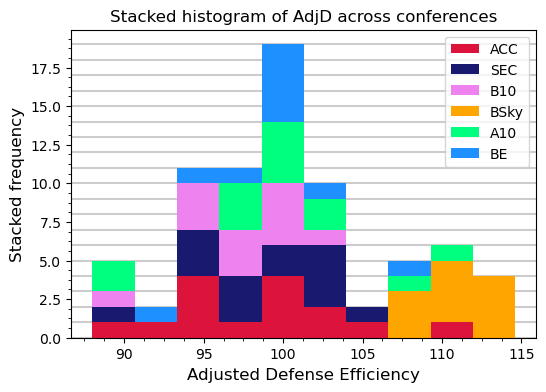

In [89]:
plt.figure(figsize=(6, 4))

# Find common bin parameters
all_values = np.concatenate(list(conferences.values()))
min_value, max_value = np.min(all_values), np.max(all_values)
bins = np.linspace(min_value, max_value, 11)

data = [values for values in conferences.values()]
labels = [team for team in conferences.keys()]

ax = plt.gca()
ax.xaxis.set_minor_locator(AutoMinorLocator(4))
ax.yaxis.set_minor_locator(AutoMinorLocator(4))
ax.tick_params(which='minor', length=2, color='k')

for i in range(0,20,2.5):
    plt.axhline(y=i, color='k',alpha=0.2,zorder=0)

plt.hist(data, bins=bins, alpha=1., linewidth=1, label=labels, histtype='barstacked',zorder=1)

plt.title('Stacked histogram of AdjD across conferences',fontsize=12)
plt.xlabel('Adjusted Defense Efficiency',fontsize=12)
plt.ylabel('Stacked frequency',fontsize=12)
plt.legend()
plt.savefig('StackedHistograms_BE.pdf')
plt.show()

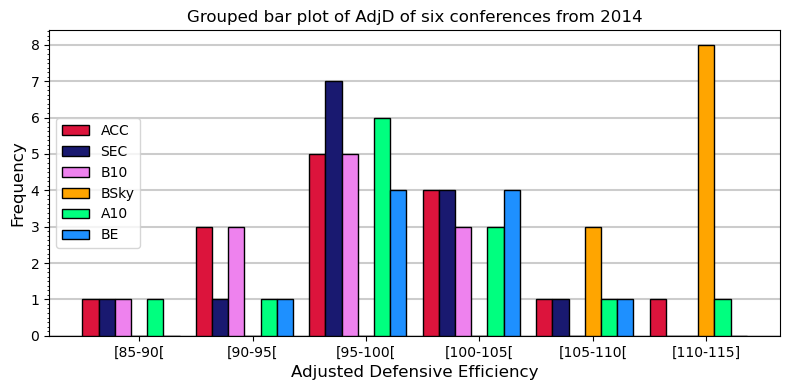

In [96]:
# Define the bins
bins = [85, 90, 95, 100, 105, 110, 115]

n_datasets = len(data)
bar_width = 1.0 / (n_datasets + 1)  # Padding between groups
bin_labels = [f'[{bins[i]}-{bins[i+1]}[' for i in range(len(bins)-1)]
bin_labels[-1] = f'[{bins[5]}-{bins[-1]}]'

plt.figure(figsize=(8,4))
ax = plt.subplot(111)

for i, dataset in enumerate(data):
    hist, _ = np.histogram(dataset, bins=bins)
    positions = np.arange(len(bins) - 1) + i * bar_width
    ax.bar(positions, hist, width=bar_width, alpha=1.,label=f'{labels[i]}',zorder=10,edgecolor='black')

ax.set_xticks(np.arange(len(bins) - 1) + bar_width * n_datasets / 2)
ax.set_xticklabels(bin_labels)

for i in range(0,9):
    plt.axhline(y=i, color='k',alpha=0.2,zorder=0)
    
ax.set_axisbelow(True)

ax = plt.gca()
# ax.xaxis.set_minor_locator(AutoMinorLocator(8))
ax.yaxis.set_minor_locator(AutoMinorLocator(8))
ax.tick_params(which='minor', length=1.5, color='k')

plt.xlabel('Adjusted Defensive Efficiency',fontsize=12)
plt.ylabel('Frequency',fontsize=12)
plt.title('Grouped bar plot of AdjD of six conferences from 2014',fontsize=12)
plt.legend(loc='best')
plt.tight_layout()
plt.savefig('GroupedHistograms_BE.pdf')
plt.show()

**2009 to 2014 change in AdjO**

In [91]:
#conferences = {'ACC': [],'SEC': [],'B10': [],'BSky': [],'A10': []}
conferences = {'ACC': [],'SEC': [],'B10': [],'BSky': [],'A10': [],'BE':[]}
sad = {'rejects':[]}

for index,rows in df.iterrows(): # Iterate over 2014 df
    
    conference = rows['Conference'] 
    team = rows['Team']
    AdjO = rows['AdjO']
    
    if conference in conferences: # Check if conference is one of 5
        for index_2,rows_2 in df_2.iterrows(): # Loop over 2009 df
            team_2009 = rows_2['Team']
            AdjO_2009 = rows_2['AdjO']
            if team == team_2009: # If same team found, find difference
                conferences[conference].append([float(AdjO)-float(AdjO_2009),float(AdjO_2009)])

    else:
        for index_2,rows_2 in df_2.iterrows(): # Loop over 2009 df
            team_2009 = rows_2['Team']
            AdjO_2009 = rows_2['AdjO']
            if team == team_2009:
                sad['rejects'].append([float(AdjO)-float(AdjO_2009),float(AdjO_2009)])

**Plot change**

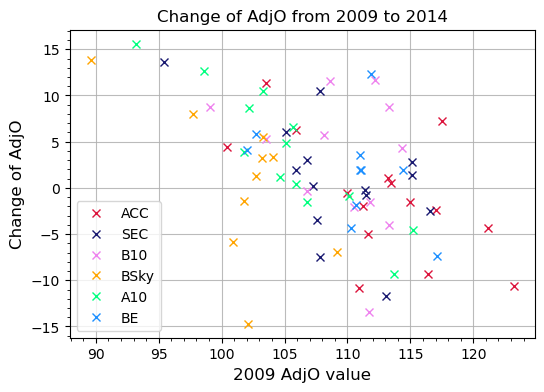

In [92]:
plt.figure(figsize=(6, 4))

for key,value in conferences.items():
    x_values = [v[1] for v in value]
    y_values = [v[0] for v in value]
    plt.errorbar(x_values,y_values, marker='x', linestyle='',alpha=1., label=f'{key}')

ax = plt.gca()
ax.xaxis.set_minor_locator(AutoMinorLocator(5))
ax.yaxis.set_minor_locator(AutoMinorLocator(5))
ax.tick_params(which='minor', length=2, color='k')
plt.grid(True,alpha=0.85,zorder=-10)

plt.title('Change of AdjO from 2009 to 2014',fontsize=12)
plt.xlabel('2009 AdjO value',fontsize=12)
plt.ylabel('Change of AdjO',fontsize=12)
plt.legend()
plt.savefig('ChangeAdjO_BE.pdf')
plt.show()

**Computing means and medians**

In [93]:
means = []
medians = []

for key,value in conferences.items(): # Compute means+median for the included conferences
    adjo_changes = [v[0] for v in value]
    means.append(np.mean(adjo_changes))
    medians.append(np.median(adjo_changes))
    
for key,value in sad.items(): # Compute means+median for the excluded conferences
    adjo_changes = [v[0] for v in value]
    adjo_changes = [v[0] for v in value]
    means.append(np.mean(adjo_changes))
    medians.append(np.median(adjo_changes))

In [94]:
means

[-1.0466666666666697,
 0.9428571428571441,
 2.891666666666668,
 0.6200000000000031,
 3.6923076923076925,
 1.7899999999999991,
 2.601865671641791]

In [95]:
medians

[-1.5,
 0.8000000000000043,
 4.799999999999997,
 2.25,
 3.9000000000000057,
 1.9000000000000057,
 1.5]